# Predicting Loan Defaulter

## 1. Business Problem
<p style='text-align: justify;'> Commercial banks receive a lot of applications for loans. Many of them could come out as defaulters for many reasons, like high loan balances, low income levels or poor credit score, for example. Manually analyzing these applications is mundane, error prone, and also time consuming but and time is money. Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this project, I built an automatic loan defaulter predictor using machine learning techniques, just like the real banks do.

The data used in this project is the **Loan Defaulter** dataset from the **Purpose Financial Analytics** Team. </p>

### Summary Results
<p style='text-align: justify;'> After analyzing the data, the only solid conclusion I reached is that the applicants with history of 90 days of delinquency, charged-off accounts, low monthly income and with more dependants are more likely to turn out as loan defaulters.

For more details, please refer to the the full analysis below. </p>

In [42]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
# sns.set_style("white")
plt.style.use('fivethirtyeight')

## 2. Inspecting the applications
<p style='text-align: justify;'> As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features. The features in the dataset are date_of_birth, number_dependants, credit_utilization, debt_to_income_ratio, monthly_income, number_open_credit_lines, number_open_loans, number_90_days_past_due, number_charged_off, score1 (credit score) and score2 (credit score). This gives us a pretty good starting point as all the features are pretty much intuitive. </p>

In [43]:
# loading data
df_train = pd.read_csv('train.csv', parse_dates = ['date_of_birth'])
df_test = pd.read_csv('test.csv', parse_dates = ['date_of_birth'])
df_train.head()

,id,date_of_birth,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score1,score2,target
0,1,1993-03-14,1,0.036495,0.208897,2400,6,2,0,0,570,817,0
1,2,1966-09-27,1,0.023423,0.260438,2200,6,1,0,0,741,756,0
2,3,1931-01-11,2,0.027205,0.335922,3000,6,1,0,1,805,779,0
3,4,1953-01-07,1,0.009141,0.353779,2100,2,4,0,0,573,829,0
4,5,1943-11-17,0,0.068424,0.314966,2500,2,3,0,0,833,629,0


In [44]:
df_test.head()

,id,date_of_birth,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score1,score2
0,14,1980-05-15,0,0.001010,0.289556,2000,6,0,1,0,837,518
1,24,1967-06-09,0,0.032225,0.368951,2600,5,2,0,0,731,656
2,83,1946-09-07,0,0.019998,0.265779,2200,4,0,0,0,644,784
3,104,1991-07-25,2,0.052280,0.415845,2100,3,2,0,0,573,686
4,127,1948-09-17,0,0.070865,0.193792,2000,4,1,0,1,777,747


## 3. Cleaning the applicants data
<p style='text-align: justify;'> First, I checked for null values in both train set and test set, did not find any. I did not find any duplicate rows too. Then, I checked the data statistics. I noticed that number_dependants had a value of '-1'. However, Number of dependants can never be negative. Hence, I replaced all the -ve values with the most frequent value '0'. </p>

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20839 entries, 0 to 20838
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        20839 non-null  int64         
 1   date_of_birth             20839 non-null  datetime64[ns]
 2   number_dependants         20839 non-null  int64         
 3   credit_utilization        20839 non-null  float64       
 4   debt_to_income_ratio      20839 non-null  float64       
 5   monthly_income            20839 non-null  int64         
 6   number_open_credit_lines  20839 non-null  int64         
 7   number_open_loans         20839 non-null  int64         
 8   number_90_days_past_due   20839 non-null  int64         
 9   number_charged_off        20839 non-null  int64         
 10  score1                    20839 non-null  int64         
 11  score2                    20839 non-null  int64         
 12  target            

In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        1000 non-null   int64         
 1   date_of_birth             1000 non-null   datetime64[ns]
 2   number_dependants         1000 non-null   int64         
 3   credit_utilization        1000 non-null   float64       
 4   debt_to_income_ratio      1000 non-null   float64       
 5   monthly_income            1000 non-null   int64         
 6   number_open_credit_lines  1000 non-null   int64         
 7   number_open_loans         1000 non-null   int64         
 8   number_90_days_past_due   1000 non-null   int64         
 9   number_charged_off        1000 non-null   int64         
 10  score1                    1000 non-null   int64         
 11  score2                    1000 non-null   int64         
dtypes: datetime64[ns](1),

In [47]:
df_train.duplicated().sum()

0

In [48]:
df_test.duplicated().sum()

0

In [49]:
# checking the data statistics
df_train.describe()

,id,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score1,score2,target
count,20839.000000,20839.000000,2.083900e+04,20839.000000,20839.000000,20839.000000,20839.000000,20839.000000,20839.000000,20839.000000,20839.00000,20839.000000
mean,10923.946878,0.483421,4.815929e-02,0.333507,2290.772110,4.997745,2.027497,0.098901,0.098901,669.511637,669.29440,0.102164
std,6295.585008,0.719653,4.571744e-02,0.117332,320.090288,2.248021,1.431671,0.314963,0.315420,98.005767,98.60763,0.302871
min,1.000000,-1.000000,3.932283e-07,0.029386,2000.000000,0.000000,0.000000,0.000000,0.000000,500.000000,500.00000,0.000000
25%,5482.000000,0.000000,1.436676e-02,0.247782,2100.000000,3.000000,1.000000,0.000000,0.000000,584.000000,583.00000,0.000000
50%,10929.000000,0.000000,3.478343e-02,0.325432,2200.000000,5.000000,2.000000,0.000000,0.000000,669.000000,670.00000,0.000000
75%,16366.500000,1.000000,6.789546e-02,0.411210,2400.000000,6.000000,3.000000,0.000000,0.000000,755.000000,754.00000,0.000000
max,21839.000000,6.000000,5.387018e-01,0.801838,5000.000000,15.000000,9.000000,3.000000,3.000000,839.000000,839.00000,1.000000


In [50]:
df_train.number_dependants.value_counts()

 0    12532
 1     6254
 2     1552
 3      251
-1      209
 4       35
 5        4
 6        2
Name: number_dependants, dtype: int64

In [51]:
# replacing -1 with 0
df_train.loc[df_train['number_dependants'] == -1,"number_dependants"] = 0
df_test.loc[df_test['number_dependants'] == -1,"number_dependants"] = 0

In [52]:
df_train.number_dependants.value_counts()

0    12741
1     6254
2     1552
3      251
4       35
5        4
6        2
Name: number_dependants, dtype: int64

## 4. Exploratory Data Analysis

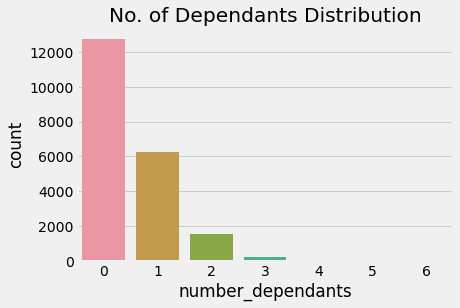

In [53]:
sns.countplot(data = df_train, x = 'number_dependants')
plt.title('No. of Dependants Distribution')
plt.show()

**It can be noticed that over 50% of the applicants have no dependants and  over 30% of the applicants have only 1 dependant** 

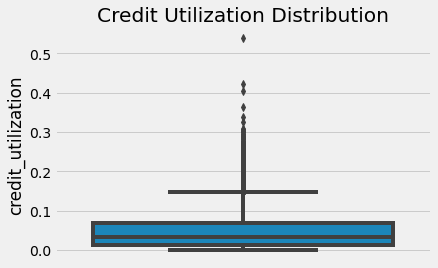

In [54]:
sns.boxplot(data = df_train, y = 'credit_utilization')
plt.title('Credit Utilization Distribution')
plt.show()

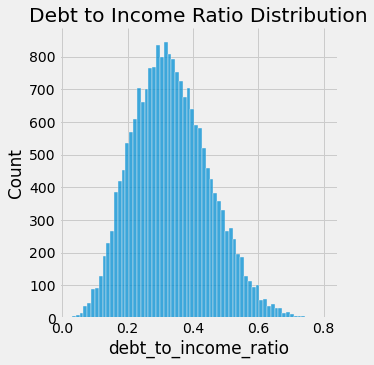

In [55]:
sns.displot(data = df_train, x = 'debt_to_income_ratio')
plt.title('Debt to Income Ratio Distribution')
plt.show()

**As we can see, it's prefectly normally distributed with mean less than 0.4, which means the overall borrowing risk is lower than standard 0.43.**

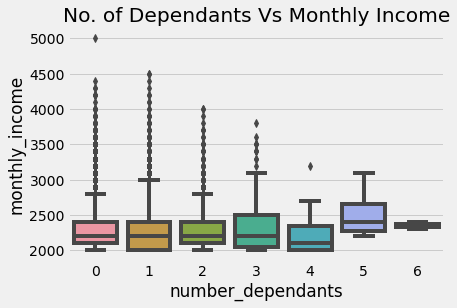

In [56]:
sns.boxplot(data = df_train, y = 'monthly_income', x = 'number_dependants')
plt.title('No. of Dependants Vs Monthly Income')
plt.show()

**The number of dependants seems to have relative effect on the monthly income. However, people with high monthly income tend to have one or two dependants at most or none at all.**

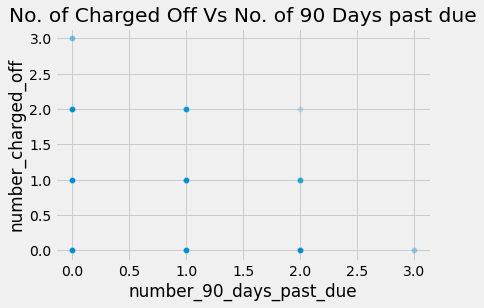

In [57]:
sns.scatterplot(data = df_train, y = 'number_charged_off', x = 'number_90_days_past_due', alpha = 0.2)
plt.title('No. of Charged Off Vs No. of 90 Days past due')
plt.show()

**As we perceive, the lesser the number of 90 days past due, the more the chance of the number of charged off.**

### Checking for Feature Correlation

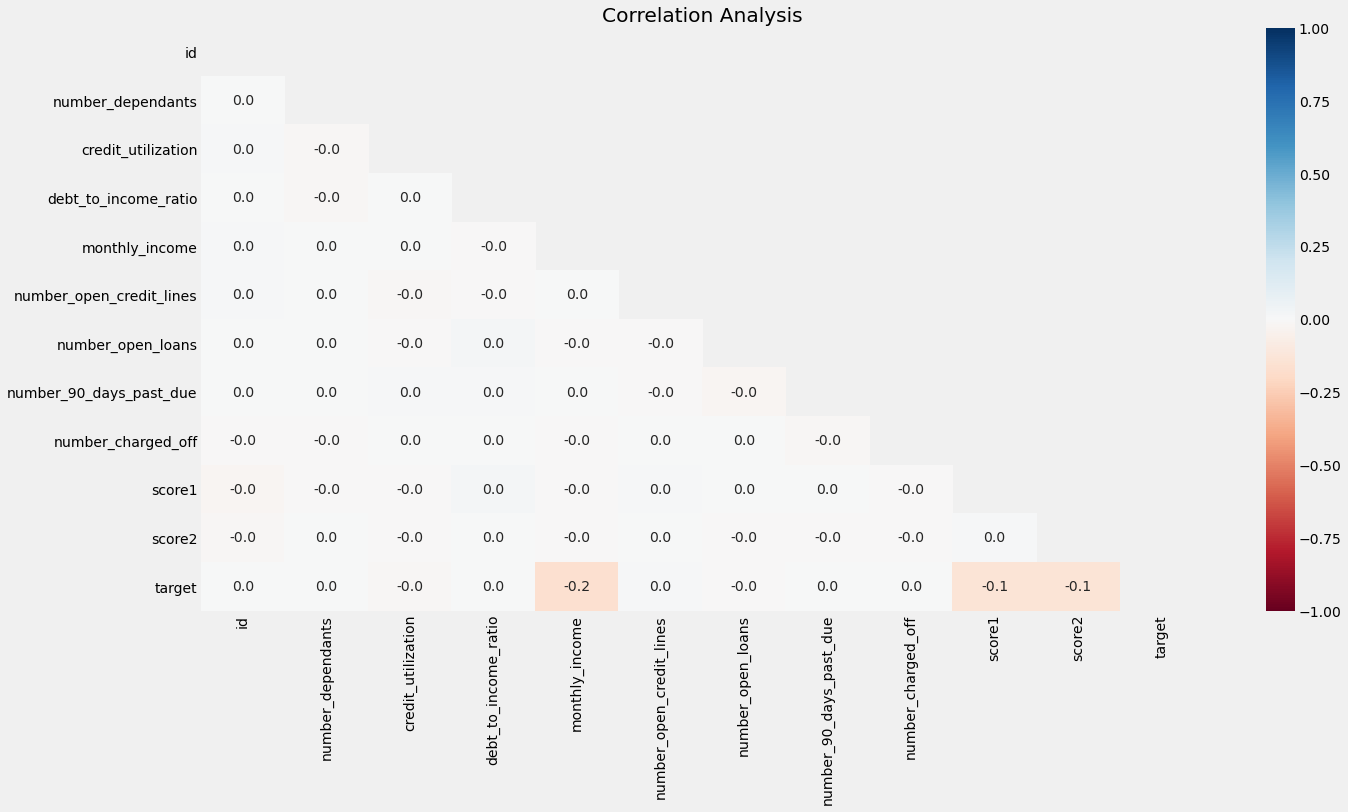

In [58]:
# correlation matrix and heatmap to stand on important features
corr_matrix = df_train.corr()
mask = np.triu(np.ones_like(corr_matrix,dtype = bool))
plt.figure(figsize = (20, 10))
sns.heatmap(corr_matrix, fmt = '0.1f', cmap = 'RdBu', mask = mask, annot = True, vmin = -1, vmax = 1)
plt.title("Correlation Analysis");

**Apparently there is no correlation between our target variable and most of the independent variables and also there is only weak correlation between the 'target' and 'monthly_income', 'score1', and 'score2' features.**

### Inspecting Class distribution

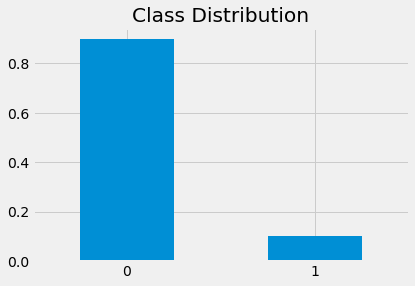

In [59]:
df_train['target'].value_counts(normalize = True).plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Class Distribution')
plt.show()

**It's clear that the data is imbalanced.**

### Feature Engineering

**Since the 'date_of_birth' column is of no value to our model, it's best we use it to engineer a new feature 'age'**.

In [60]:
from datetime import datetime, date

today = date.today()

df_train['age'] = today.year - df_train['date_of_birth'].dt.year
df_test['age'] = today.year - df_test['date_of_birth'].dt.year

**Since there is two columns of 'Score', we can merge them into one column using their average.**

In [61]:
df_train['avg_score'] = (df_train['score1'] + df_train['score2'])/2
df_test['avg_score'] = (df_test['score1'] + df_test['score2'])/2

In [62]:
df_train.head()

,id,date_of_birth,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score1,score2,target,age,avg_score
0,1,1993-03-14,1,0.036495,0.208897,2400,6,2,0,0,570,817,0,28,693.5
1,2,1966-09-27,1,0.023423,0.260438,2200,6,1,0,0,741,756,0,55,748.5
2,3,1931-01-11,2,0.027205,0.335922,3000,6,1,0,1,805,779,0,90,792.0
3,4,1953-01-07,1,0.009141,0.353779,2100,2,4,0,0,573,829,0,68,701.0
4,5,1943-11-17,0,0.068424,0.314966,2500,2,3,0,0,833,629,0,78,731.0


### Checking for correlation after adding features

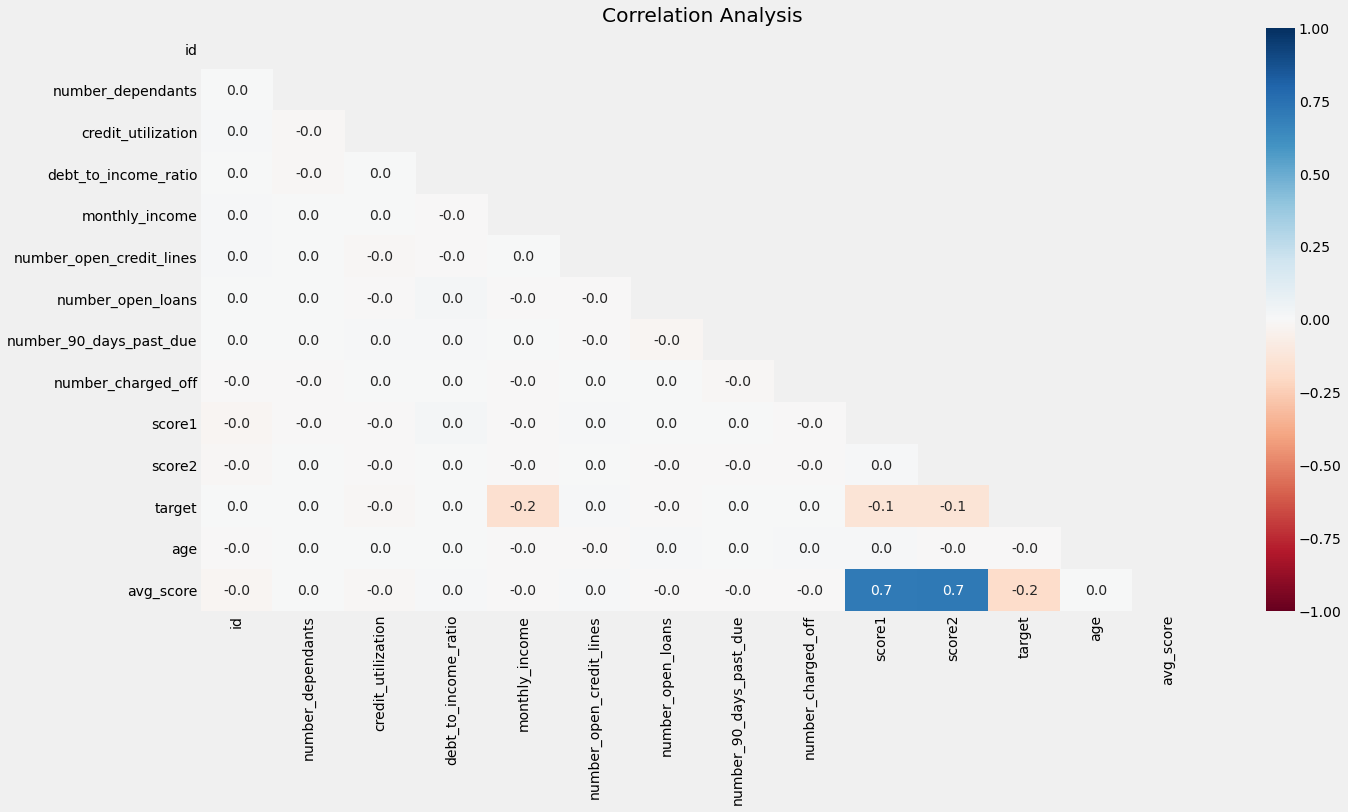

In [63]:
# correlation matrix and heatmap to stand on important features
corr_matrix = df_train.corr()
mask = np.triu(np.ones_like(corr_matrix,dtype = bool))
plt.figure(figsize = (20, 10))
sns.heatmap(corr_matrix, fmt = '0.1f', cmap = 'RdBu', mask = mask, annot = True, vmin = -1, vmax = 1)
plt.title("Correlation Analysis");

**As we can see, the added feature 'avg_score' is more correlated to the target than both 'score1' and 'score2' features separated.**

## 5. Preprocessing the data

In [64]:
X = df_train.drop(columns = ['id', 'date_of_birth', 'target'])
y = df_train['target']

### Upsampling

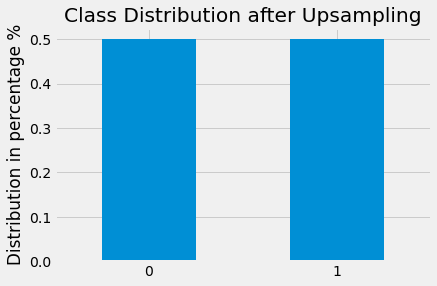

In [65]:
# use SMOTE to upsample the minority class
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

y.value_counts(normalize = True).plot(kind = 'bar')
plt.title('Class Distribution after Upsampling')
plt.ylabel('Distribution in percentage %')
plt.xticks(rotation = 0)
plt.show()

### Scaling features

In [67]:
y

0        0
1        0
2        0
3        0
4        0
        ..
37415    1
37416    1
37417    1
37418    1
37419    1
Name: target, Length: 37420, dtype: int64

In [25]:
# standard Scaler for Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy = True, with_mean = True, with_std = True)

X = scaler.fit_transform(X)
testDF = scaler.fit_transform(df_test.drop(columns = ['id', 'date_of_birth']))

### Splitting the data into train and test sets

In [26]:
from sklearn.model_selection import train_test_split

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 44, shuffle = True)

# splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (29936, 12)
X_test shape is  (7484, 12)
y_train shape is  (29936,)
y_test shape is  (7484,)


## 6. Fitting Machine Learning Models and Evaluating performance

### Logestic Regression Model

In [27]:
# import evaluation libraries
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix, f1_score

In [28]:
from sklearn.linear_model import LogisticRegression

# applying LogisticRegression Model 
LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel.fit(X_train, y_train)

# calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))

# calculating Prediction
lr_y_pred = LogisticRegressionModel.predict(X_test)
lr_y_pred_prob = LogisticRegressionModel.predict_proba(X_test)

LogisticRegressionModel Train Score is :  0.7351015499732764
LogisticRegressionModel Test Score is :  0.7323623730625334


### Evaluation

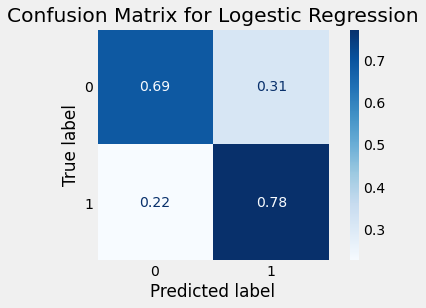

In [29]:
plot_confusion_matrix(LogisticRegressionModel, X_test, y_test, cmap = 'Blues', normalize = 'true')
plt.grid(False)
plt.title('Confusion Matrix for Logestic Regression')
plt.show()

In [30]:
ClassificationReport = classification_report(y_test,lr_y_pred)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       0.75      0.69      0.72      3699
           1       0.72      0.78      0.75      3785

    accuracy                           0.73      7484
   macro avg       0.73      0.73      0.73      7484
weighted avg       0.73      0.73      0.73      7484



### Random Forest Model

In [31]:
from sklearn.ensemble import RandomForestClassifier

# applying RandomForestClassifier Model 
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini', n_estimators = 200, max_depth = 3, random_state = 33) 
RandomForestClassifierModel.fit(X_train, y_train)

# calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))

# calculating Prediction
rf_y_pred = RandomForestClassifierModel.predict(X_test)
rf_y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)

RandomForestClassifierModel Train Score is :  0.7197020309994655
RandomForestClassifierModel Test Score is :  0.7107161945483699


### Evaluation

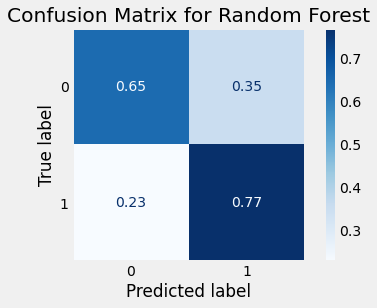

In [32]:
plot_confusion_matrix(RandomForestClassifierModel, X_test, y_test, cmap = 'Blues', normalize = 'true')
plt.grid(False)
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [33]:
ClassificationReport = classification_report(y_test,rf_y_pred, zero_division = 0)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       0.74      0.65      0.69      3699
           1       0.69      0.77      0.73      3785

    accuracy                           0.71      7484
   macro avg       0.71      0.71      0.71      7484
weighted avg       0.71      0.71      0.71      7484



### XGBoost Model

In [34]:
from xgboost import XGBClassifier

# applying XGBClassifier Model 
XGBClassifierBModel = XGBClassifier( eval_metric = 'mlogloss', use_label_encoder = False)

XGBClassifierBModel.fit(X_train, y_train)

# calculating Details
print('XGBClassifierBModel Train Score is : ' , XGBClassifierBModel.score(X_train, y_train))
print('XGBClassifierBModel Test Score is : ' , XGBClassifierBModel.score(X_test, y_test))

# calculating Prediction
xgb_y_pred = XGBClassifierBModel.predict(X_test)
xgb_y_pred_prob = XGBClassifierBModel.predict_proba(X_test)

XGBClassifierBModel Train Score is :  0.8882616247995724
XGBClassifierBModel Test Score is :  0.8264297167290219


### Evaluation

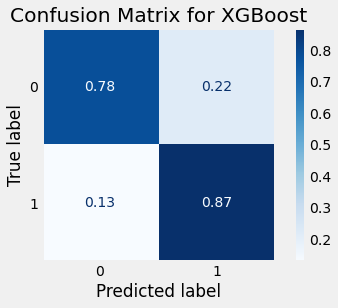

In [35]:
plot_confusion_matrix(XGBClassifierBModel, X_test, y_test, cmap = 'Blues', normalize = 'true')
plt.grid(False)
plt.title('Confusion Matrix for XGBoost')
plt.show()

In [36]:
ClassificationReport = classification_report(y_test,xgb_y_pred, zero_division = 0)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       0.85      0.78      0.82      3699
           1       0.80      0.87      0.84      3785

    accuracy                           0.83      7484
   macro avg       0.83      0.83      0.83      7484
weighted avg       0.83      0.83      0.83      7484



**Confusion matrix shows the percentage of the true positive and true negative values which are relatively high (+80%). 
It means that the model's performance is pretty good. The following report shows different metrics of the model, but we will focus on the f1 - score metric since it's more robust than others.**

### Feature Importance

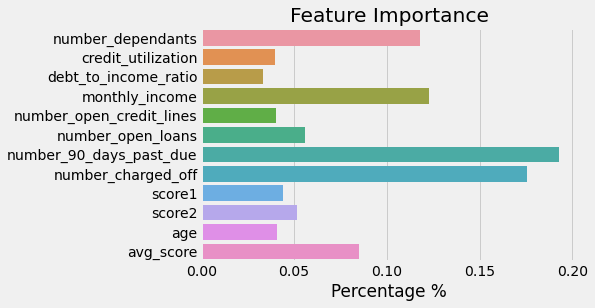

In [37]:
sns.barplot(x = XGBClassifierBModel.feature_importances_, y = df_train.drop(columns = ['id', 'date_of_birth', 'target']).columns )
plt.title('Feature Importance')
plt.xlabel('Percentage %')
plt.show()

## 7. Finding the best performing model

In [38]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, lr_y_pred)
lr_roc_auc = auc(fpr, tpr)

fpr, tpr, threshold = roc_curve(y_test, rf_y_pred)
rf_roc_auc = auc(fpr, tpr)

fpr, tpr, threshold = roc_curve(y_test, xgb_y_pred)
xgb_roc_auc = auc(fpr, tpr)

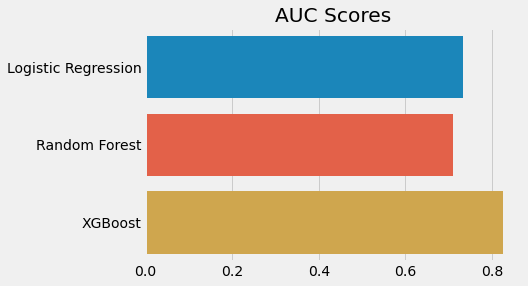

In [39]:
labels = ['Logistic Regression', 'Random Forest', 'XGBoost']
scores = [lr_roc_auc, rf_roc_auc, xgb_roc_auc]
sns.barplot(x = scores, y = labels)
plt.title('AUC Scores')
plt.show()

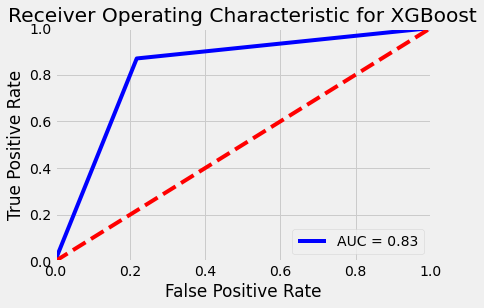

In [40]:
plt.title('Receiver Operating Characteristic for XGBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % xgb_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 8. Conclusion
<p style='text-align: justify;'> From the above evaluation metrics it can be inferred that XGBoost model performed better than Logistic and Random Forest models. After analyzing the data, the only solid conclusion I reached is that the applicants with history of 90 days of delinquency, charged-off accounts, low monthly income and with more dependants are more likely to turn out as Loan defaulters. 

**Idea for future analysis:** More data points (atleast 100,000) will improve the model's performance for prediction. </p>

## 9. Submission file

In [41]:
# writing to csv file
df_test['prediction'] = XGBClassifierBModel.predict(testDF)
df_test[['id','prediction']].to_csv('submission.csv', index = False)

### Please find the predicted test csv file generated in your directory.